In [3]:
import matplotlib.pyplot as plt
import requests
import pandas
import sqlite3
import numpy
import matplotlib
import seaborn

data = requests.get(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv').text

with open('datasethw8.csv', 'w', encoding="utf-8") as f:
    f.write(data)
data = pandas.read_csv('datasethw8.csv', sep=',')
# Показує скільки рядків та колонок має набір даних
#print(data)
conn = sqlite3.connect('sql_hw8.db', check_same_thread=False, )
cursor = conn.cursor()
columns = ' '.join(list(data.keys())).replace(' ', ',')


In [22]:
def creationandfilingDB():
    cursor.execute(f"""CREATE TABLE IF NOT EXISTS all_data ({columns})""")

    for x in data:
        cursor.execute(
            """INSERT INTO all_data VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)""",
            (x))
        conn.commit()


# Створення та наповнення бази даних
creationandfilingDB()

EXERCISE 2! ТОП 10 експортерів кави з набору даних:
                              0    1
0                        Mexico  236
1                      Colombia  183
2                     Guatemala  181
3                        Brazil  132
4                        Taiwan   75
5        United States (Hawaii)   73
6                      Honduras   53
7                    Costa Rica   51
8                      Ethiopia   44
9  Tanzania, United Republic Of   40


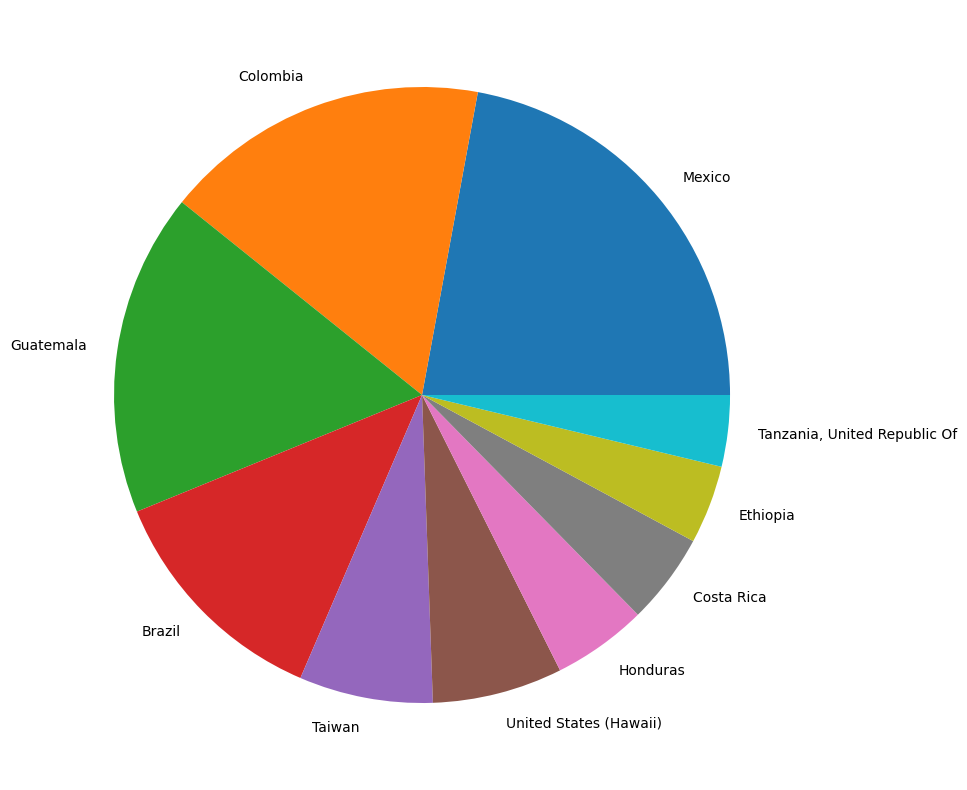

In [8]:
# 2. Какие страны являются крупными экспортерами кофе?

cursor.execute("""SELECT  country_of_origin, COUNT(country_of_origin)as exporter
                FROM all_data
                GROUP BY country_of_origin
                ORDER BY COUNT(country_of_origin) DESC
                LIMIT 10""")
exer2= cursor.fetchall()
# k=data['country_of_origin'].value_counts()
exer2=pandas.DataFrame(exer2)
print('EXERCISE 2! ТОП 10 експортерів кави з набору даних:')
print(exer2)
fig,ax=plt.subplots(figsize=(10,10))
ax.pie(exer2[1], labels=exer2[0])
plt.show()

<h3>Діаграма основних країн-експортерів кави</h3>

<AxesSubplot: >

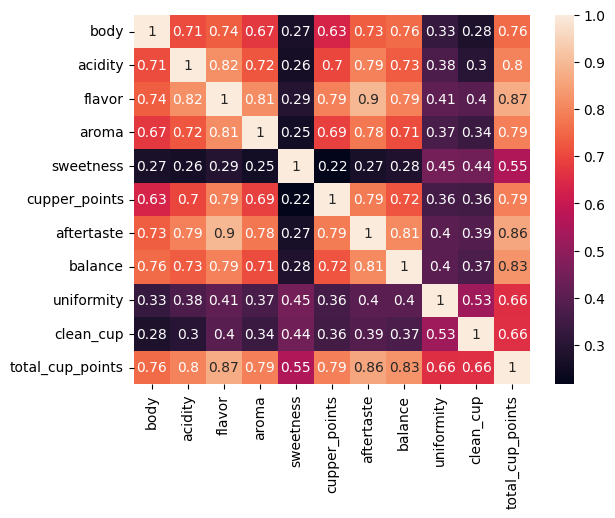

In [9]:
#3. Каковы корреляции между различными показателями оценки кофе?
column_for_matrix=['body','acidity', 'flavor', 'aroma','sweetness', 'cupper_points', 'aftertaste', 'balance', 'uniformity', 'clean_cup','total_cup_points']
corr_matrix=data.loc[:,column_for_matrix].corr()
seaborn.heatmap(corr_matrix, annot=True)

<h3>Матриця корреляції між всіма показниками оцінки кави</h3>  
    За допомогою кольору, ми бачимо, що деякі показники мають вплив на загальну оцінку та один одного.
    Чорний та фіолетовий кольори, це ті значення, що мають слабу корреляцію.
    Від світло фіолетового, до оранжевого, це показники що мають середню корреляцію.
    Від оранжевого до бежевого кольору, це ті показники, що мають дуже високу корреляцію.
      Діагональ має повний взаємозв'язок, адже на ній показники перетинаються сам з собою. 
    Це свідчить про те, що діагональ створена правильно. Показники, що тут відображені, розраховані програмою вірно
    
    Виходячи з даної матриці, бачимо, що оцінка 'sweetness', 'clean_cup', 'uniformity' не мають залежності 
    від других показників, окрім самих себе, та мають найгіршу корреляцію з 'total_cup_points'.
    
    Зробимо окрему матрицю нижче, щоб детальніше розглянути показники, що мають корреляцію між собою.
    Мною було обрано такі показники: 'flavor','aftertaste', 'balance', 'cupper_points', 'total_cup_points'
    

<AxesSubplot: >

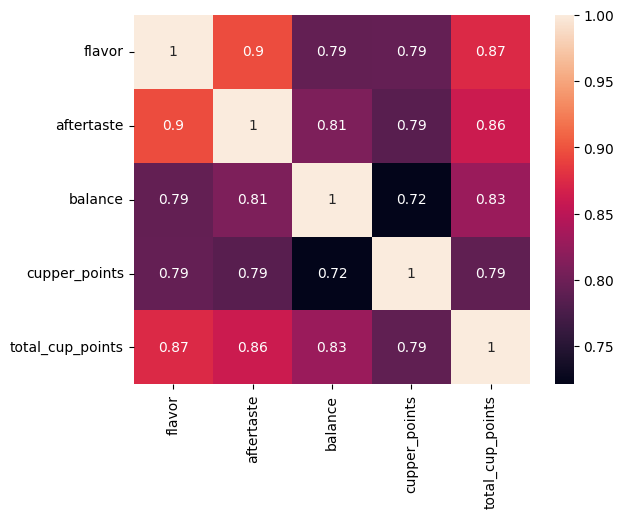

In [10]:
corr_matrix2=data.loc[:,['flavor','aftertaste', 'balance', 'cupper_points', 'total_cup_points']].corr()
seaborn.heatmap(corr_matrix2, annot=True)

<h3>Матриця корреляції між найвагомішими показниками оцінки кави</h3>   
Відразу кидаються в очі зв'язки 'flavor'=='aftertaste' та 'balance'== 'cupper_points'
В даній візуалізації чорний колір відповідає за сильну корреляцію також, просто вона є найнижчою, серед обраних показників. 
Оранжевий колір нам показує найвищу корреляцію показників.
  
    

___Отже, найбільший показник корреляції це 'flavor'=='aftertaste', впевнено можна сказати, що 9/10 випадків хорошої оцінки показника 'flavor' означатиме хорошу оцінку показника'aftertaste'.
В даній візуалізації легко побачити і інші взаємозв'язки, варто лише пам'ятати силу зв'язка за цифровим значенням.___

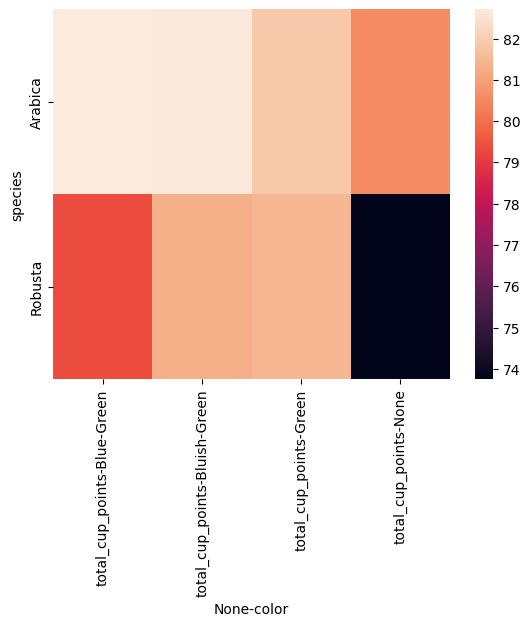

In [11]:
#4. Какое (если есть) влияние цвета зерен на общий сорт кофе?
pivot=data.pivot_table(index=["species"],columns=["color"],values=['total_cup_points'],aggfunc=numpy.average)
seaborn.heatmap(pivot)
plt.show()

<h3>Матриця корреляції впливу кольору зерна на сорт кави</h3>

Дана матриця відображає корреляцію показників кольору на сорт кави, що розрахована за допомогою загальної оцінки кави. 
Відразу варто відмітити, що всі кольору відповідають за високий взаємозв'язок. Дійсно колір кави впливає на загальний показник. 
Наприклад, 'Blue-Green Beans' сорту арабіка є елітним серед інших кольорів за оцінками споживачів-експертів. 

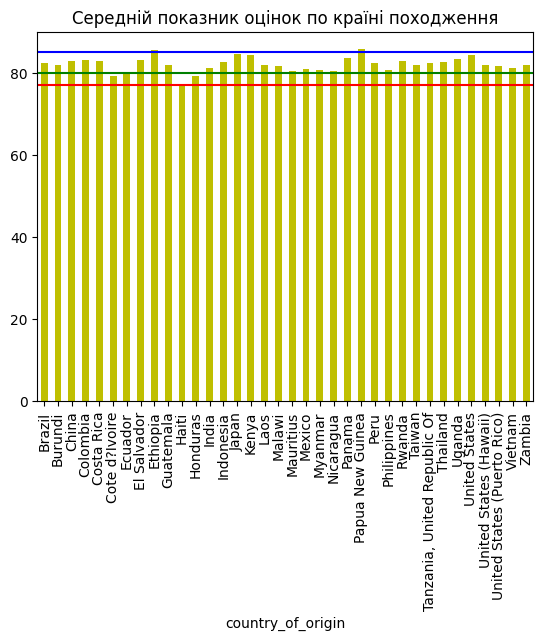

In [13]:
# Влияет ли страна происхождения на качественный кофе ?

table= pandas.pivot_table(data,index=['country_of_origin'],values=['total_cup_points'], aggfunc=numpy.mean)
sort_table=table.reindex(table.sort_values(by='total_cup_points', ascending=False).index)
# Таблиця залежності оцінки від країни походження
#print(sort_table) 
tab = table.plot(kind='bar',color='y',legend=False)
plt.axhline(y=80, c="green", label="y=0")
plt.axhline(y=85, c="blue", label="y=0")
plt.axhline(y=77, c="red", label="y=0")
tab.set_title('Середній показник оцінок по країні походження')
plt.show()

<h3>Графік середніх оцінок по країнам-експортерам</h3>

На графік було додано три горизонтальні лінії, де червона відповідає за мінімальний показник, зелена - середній, синя -найвищі показники оцінки 
В загальному, можна стверджувати, що оцінка кави не є залежною від країн-експортерів, але є певні вийнятки, які ми чітко бачимо на графіку.
1. Каву з країни Haiti обділили експерти високими балами, впевнено можна стверджувати, що в загальному, кава з Haiti має найбільш низький середній бал. Варто врахувати, що від Haiti було оцінено 6 видів кави.
2. Кава з Ethiopia та Papua New Guinea отримала найбільші середні оцінки. Варто зазначити, що від Papua New Guinea було оцінено лише один кави, в той час коли Ethiopia була оцінена за 44 представниками. На мою думку, Ethiopia заслужено посідає місце фавориту в оцінці кави.
3. Опираючись на діаграму з першого завдання, варто відмітити, що ТОП-5 країн-експортерів набрали оцінки вище 80 балів, тобто вони продають львину долю кави по всьому світу, і ця кава має гарні середні бали, я схиляюсь навіть до того, що ваша улюблена кава, чи улюблене кафе біля дому чи роботи створює справжню каву з зерен, походження яких буде з Brazil(82.4), Mexica(80), Taiwan(82.), Colоmbia(83!) чи Guatemala(81).

___Підведемо висновки: кава має дійсно різні оцінки, в залежності від країни походження. Якщо це крупний експортер, то він має сталу середню оцінку. За графіком можна побачити і каву, що отримала найбільші бали, або ж найменші.  Різниця загальної оцінки між країнами коливається в певному діапазоні, він починається з 77. поінтів та закінчується на більш ніж 85. поінтів.   Отже, країна походження має вплив на оцінку кави, інакше, ми б не знайшли фаворитів максимально і мінімального значення.___

In [15]:
# Таблиця залежності оцінки від країни походження
print(sort_table) 

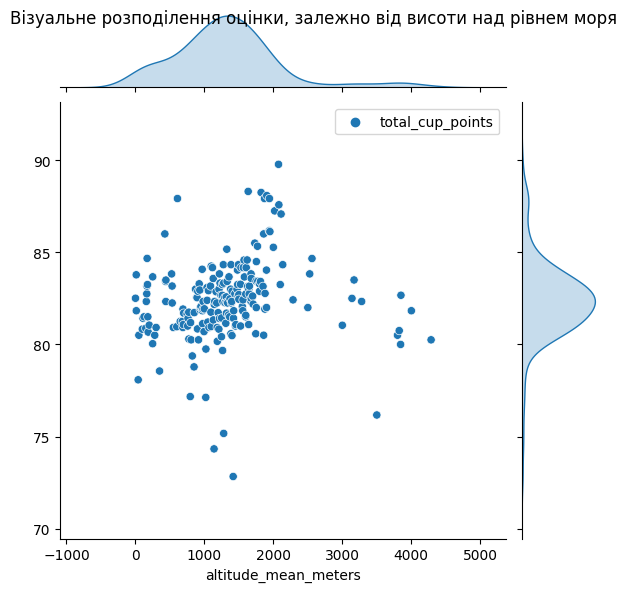

In [17]:
# 6. Существенно ли влияет высота на качество кофе
data=data[data.altitude_mean_meters!=110000.0]
data=data[data.altitude_mean_meters!=11000.0]
data=data[data.altitude_mean_meters!=190164.0]
data.loc[data['altitude_mean_meters'] == '190164.0 ', 'altitude_mean_meters'] = 'NaN'
tablemeters= pandas.pivot_table(data,index=['altitude_mean_meters'],values=['total_cup_points'], aggfunc=numpy.average)
ex6=seaborn.jointplot(data=tablemeters)
ex6.fig.suptitle('Візуальне розподілення оцінки, залежно від висоти над рівнем моря')

plt.show()

<h3>Вплив висоти на якість каву</h3>
На представленому графіку ми бачимо скупчення точок в діапазоні оцінки від 80 до 85 на рівні 300-2000 метрів. 
Це вказує на те що, на такому рівні вирощують багато кави, це якісь вулканічні чи гірські схили, враховуючи середні показники висоти.   Згідно даного графіку, можу стверджувати, що природа наділила кавове дерево певною особливості, схожу на виноградники, вони полюбляють рости на схилах, там для них створені певні умови, собливе світіння сонця та вітри, що притаманні гірським умовам.
Даний графік також показує, що занадто високі гори (від 2000 метрів) також здатні вирости зерно кави, але їх оцінки не є дуже особливі, я б сказав, що вони мають притаманність бути нижчими, аніж ті кавові сількогосподарські угіддя, що розташовані нище по схилу гори. 

___Підведемо підсумки: вирощування кави має безліч особливостей, які на перший погляд не побачиш, а при сильному аналізі не факт, що дослідиш. Проте можна сказати, що є певна закономірність у вирощуванні кави на гірських чи вулканічних схилах. Найкращі бали від експертів, доречі, зосередились на відмітці ~2000 метрів, що свідчить не лише про майстерність експертів агро-справи, а й про те, що за таких умов кава виростає смачною, та отримує позитивні оцінки на дегустаціях___